In [1]:
from TCSPC_Reconvolution import *

# Parse Data

In [2]:
# parse_FLIM_set - creates list of FLIM dataframes while parse_FLIM - just single dataframe
df_MEL = parse_FLIM_set(directory='data/example/2024-10-01/', # Folder with data
                        file_startswith='MEL_1min_c') # str with which filenames in the set start
df_IRF = parse_FLIM(filename='data/example/2024-10-01/IRF_40min.asc')

In [3]:
# Each dataframe has 2 columns (Time and Photons # that arrived on that time)
display(df_IRF)

,Time,Photons
0,0.000509,0.0
1,0.001018,0.0
2,0.001527,0.0
3,0.002036,0.0
4,0.002545,0.0
...,...,...
4090,2.082187,0.0
4091,2.082696,0.0
4092,2.083205,0.0
4093,2.083714,0.0


# Plotting

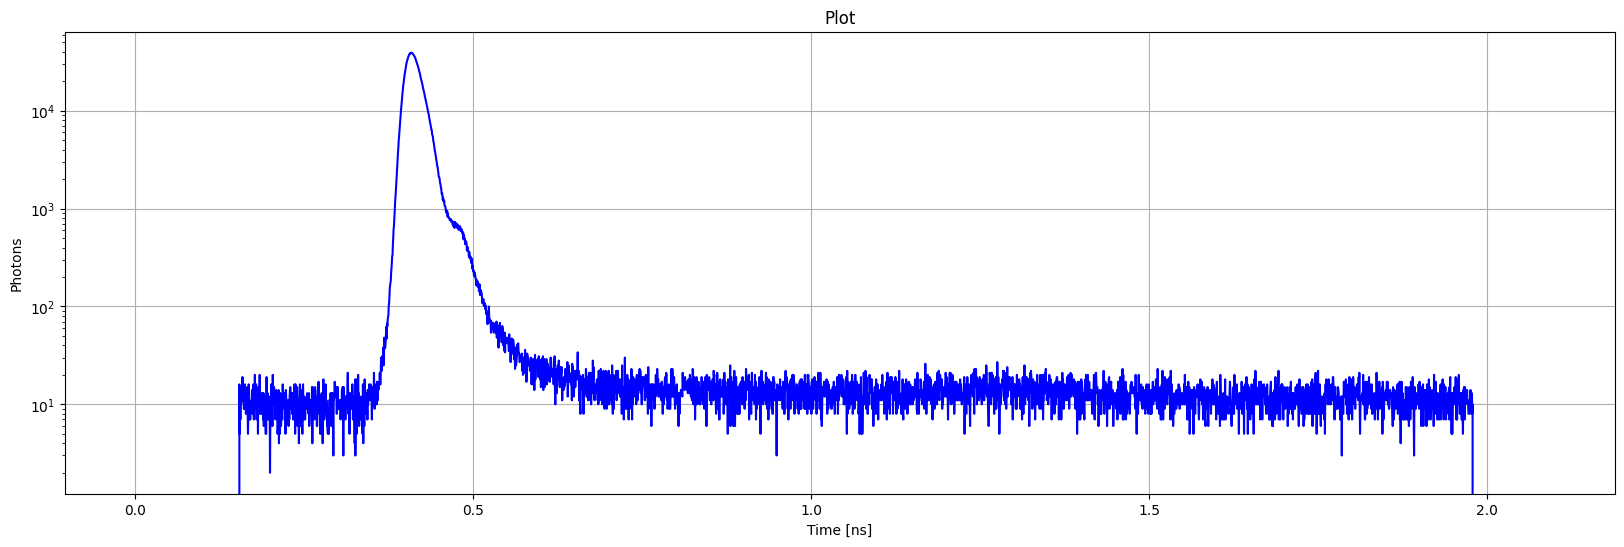

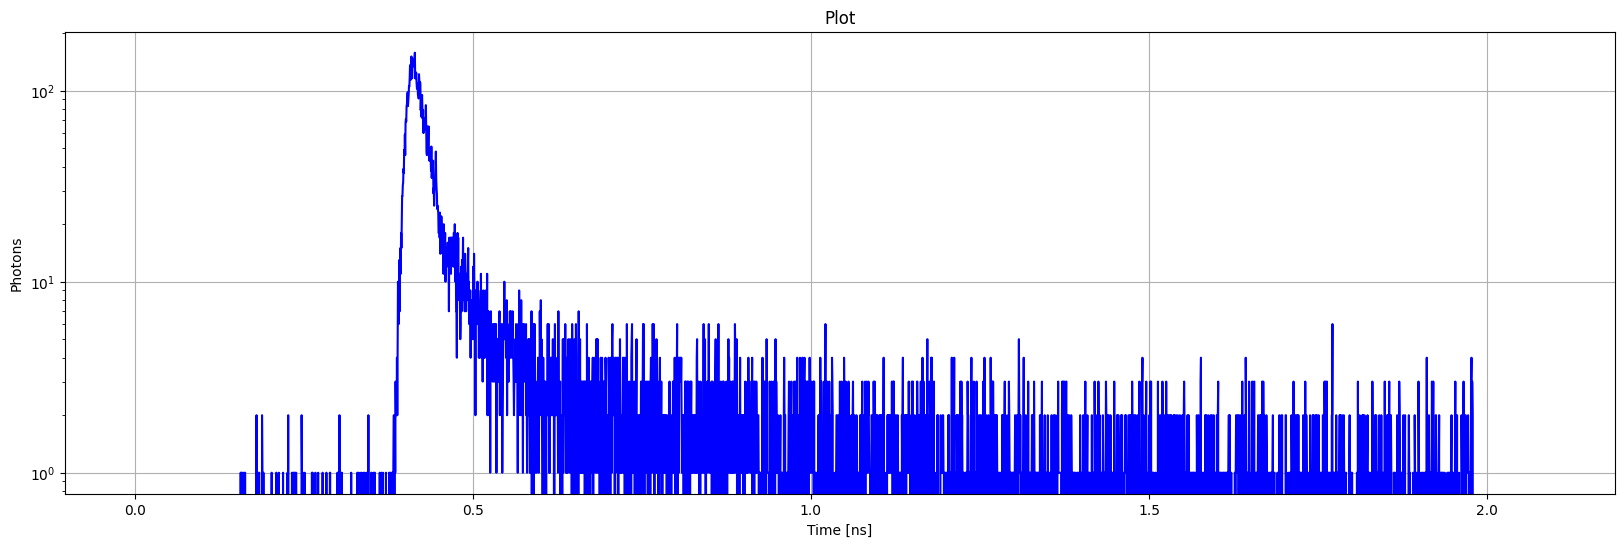

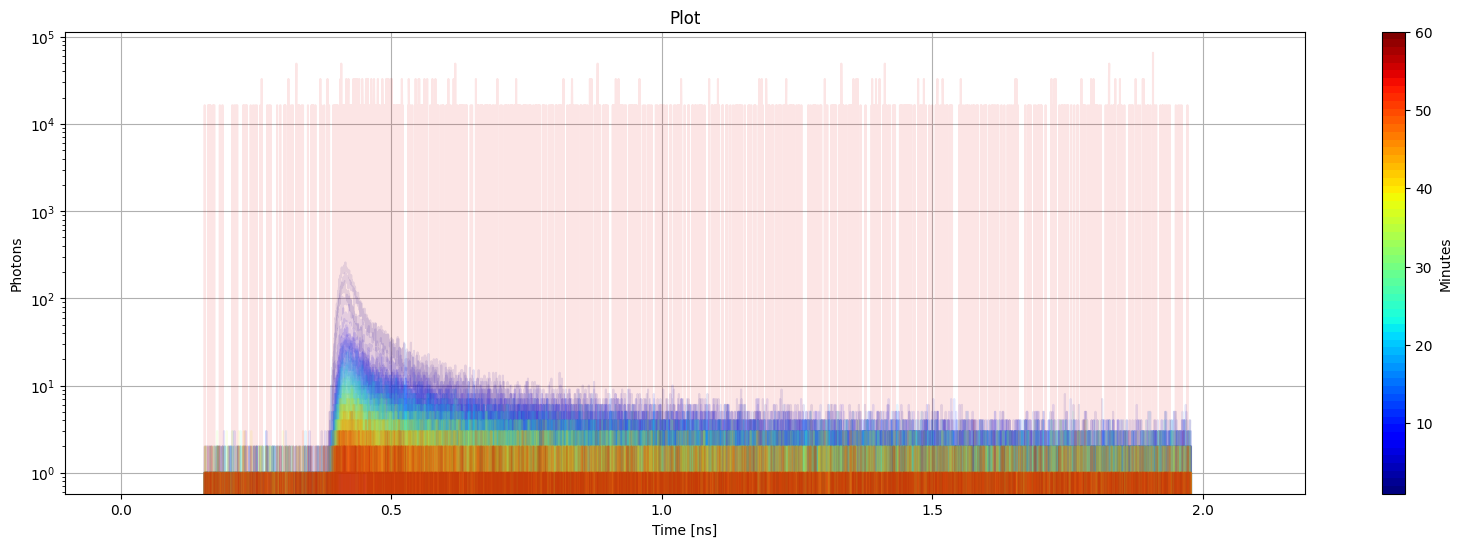

In [4]:
# Plot single spectrum
plot_FLIM_spectrum(df_IRF, title='Plot')
plot_FLIM_spectrum(df_MEL[0], title='Plot')
plot_FLIM_spectrum(df_MEL, title='Plot')

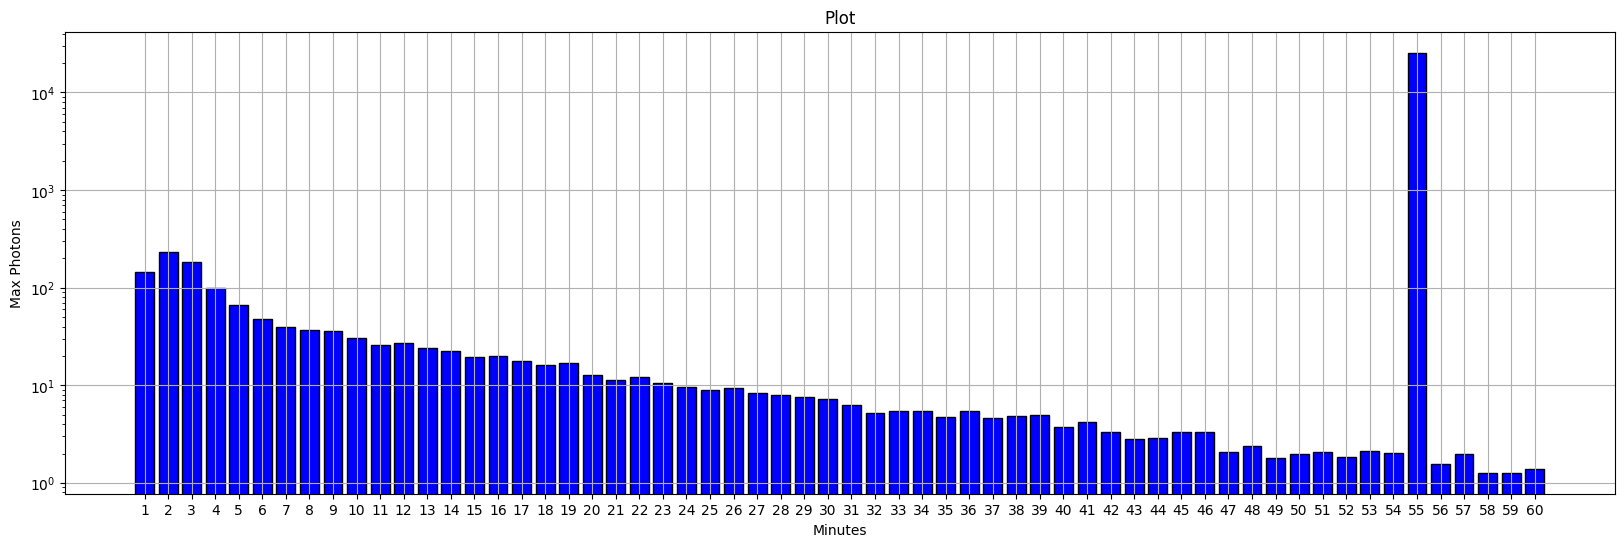

In [5]:
# Plot histograms with max photons, fwhm, integral
plot_histogram(dataframes=df_MEL,
            what_to_plot='max_photons',
            min_scale=1, # how long each cycle was
            bad_bins=None, # interpolate bad bins
            window_length=11, 
            polyorder=2,
            plot_name='Plot')

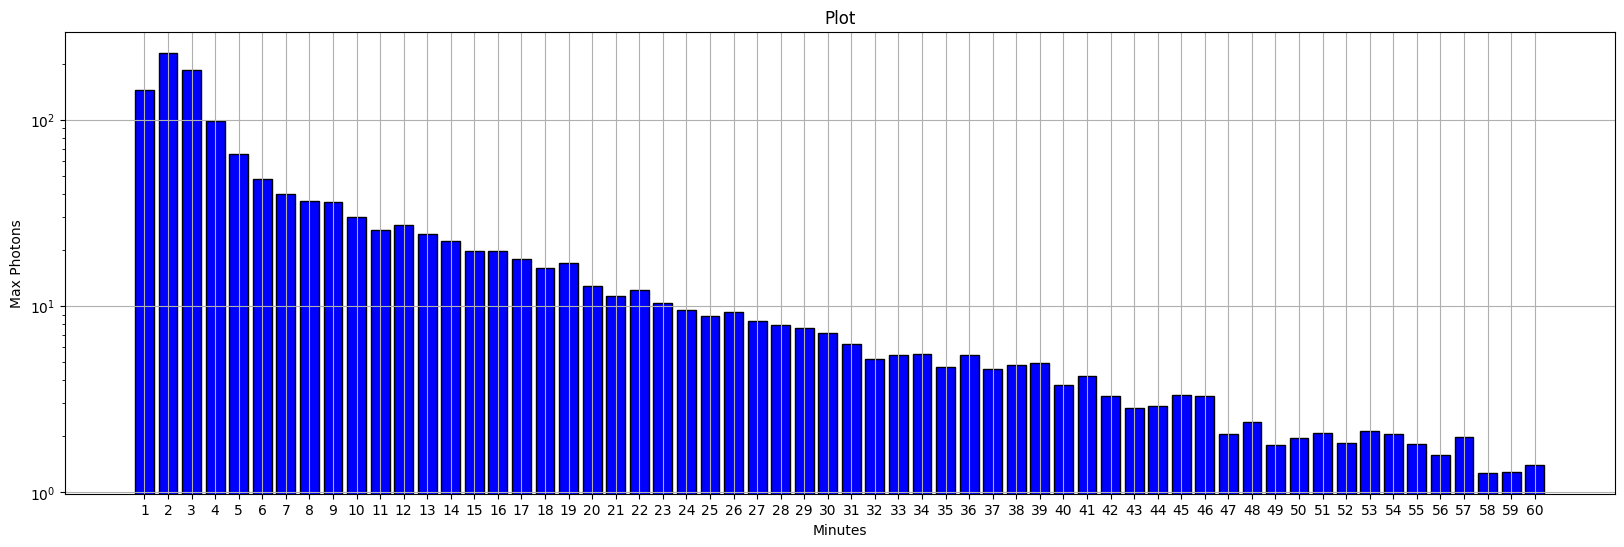

In [6]:
# As we can see at 55 min (bin 54) something happened, lets hide it
plot_histogram(dataframes=df_MEL,
            what_to_plot='max_photons',
            min_scale=1, # how long each cycle was
            bad_bins=[54], # interpolate bad bins
            window_length=11, 
            polyorder=2,
            plot_name='Plot')

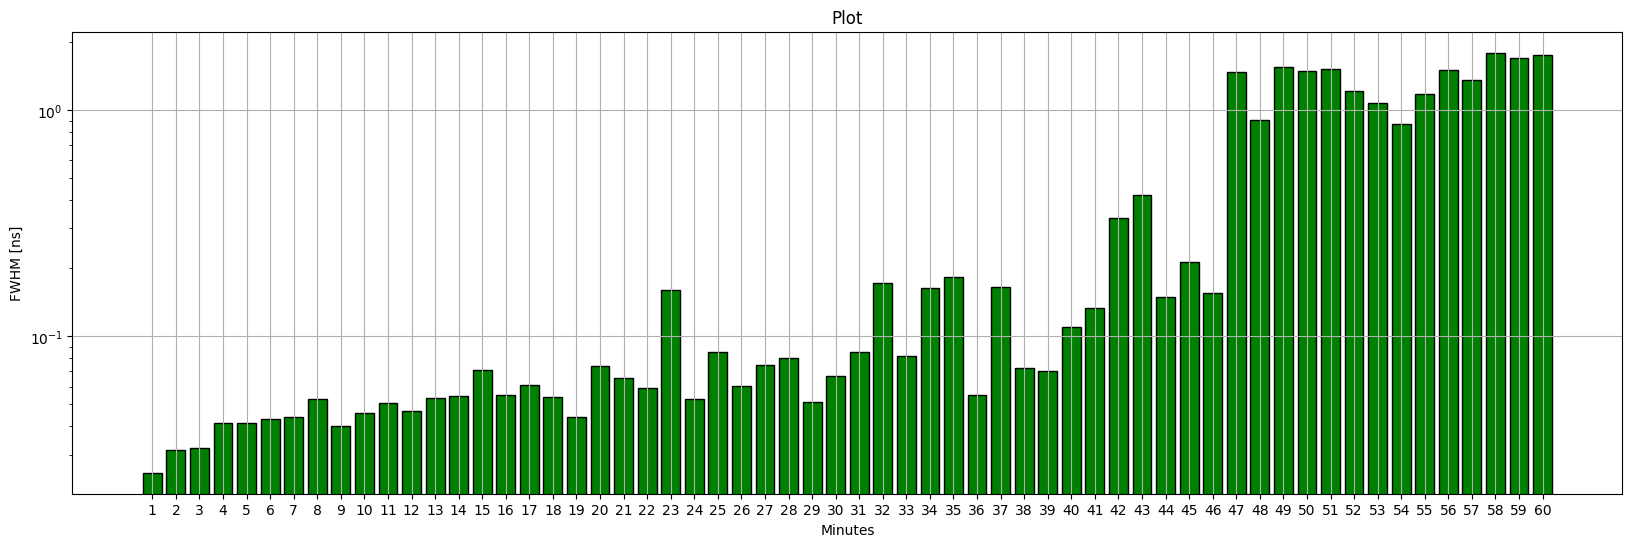

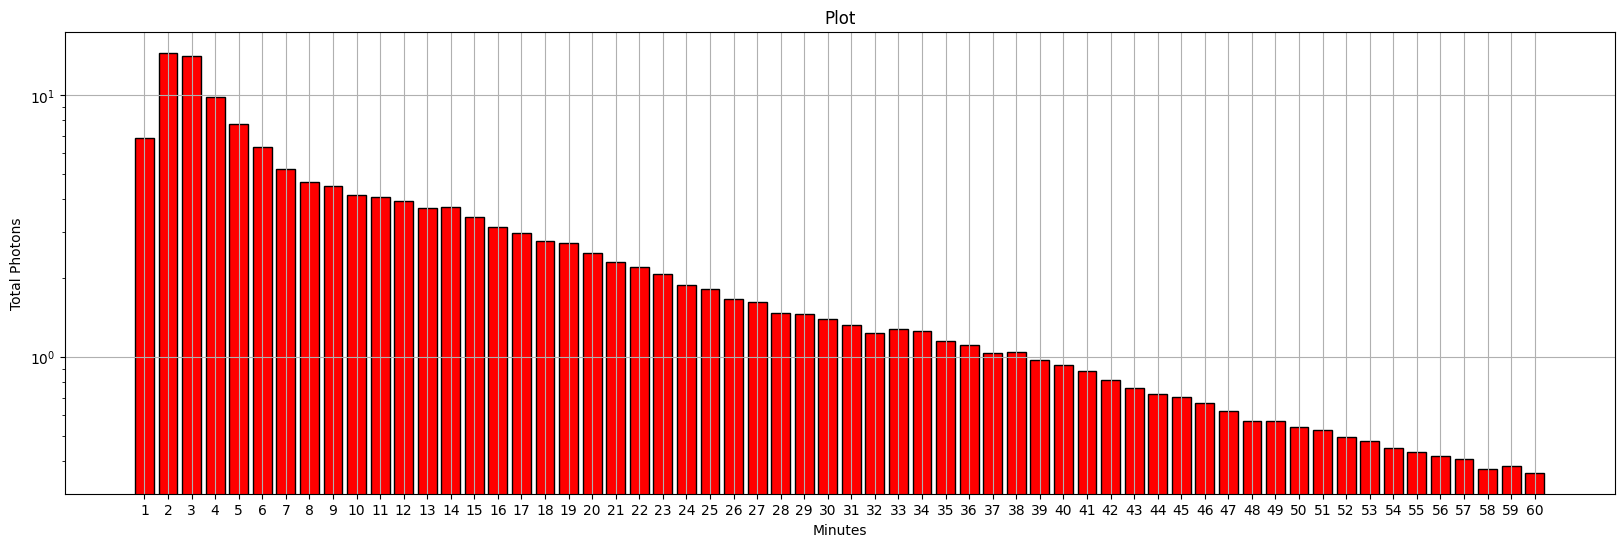

In [7]:
plot_histogram(dataframes=df_MEL,
            what_to_plot='fwhm',
            min_scale=1, # how long each cycle was
            bad_bins=[54], # interpolate bad bins
            window_length=11, 
            polyorder=2,
            plot_name='Plot')
plot_histogram(dataframes=df_MEL,
            what_to_plot='integral',
            min_scale=1, # how long each cycle was
            bad_bins=[54], # interpolate bad bins
            window_length=11, 
            polyorder=2,
            plot_name='Plot')

# Reconvolution Fit

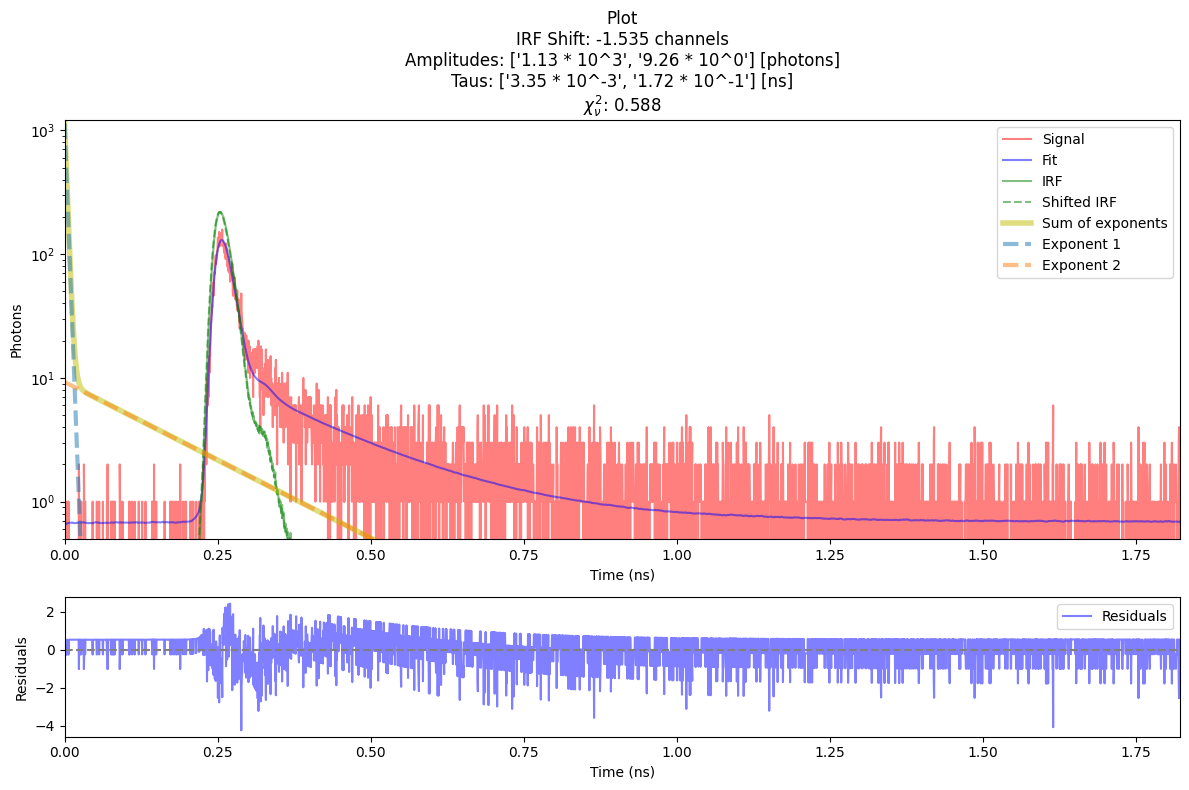

((0.003345958008982465, 0.172312144404512),
 (1134.8395000680625, 9.261031752004115),
 -1.534911667880263,
 0.6376632772785826,
 0.5874328457870855)

In [8]:
reconvolution_fit([df_MEL[0], df_IRF], 
                  exp_num=2, 
                  tau_bounds=None, # (1e-12, 0) if None
                  irf_shift_bounds=[-500, 500], 
                  smooth=None, # or savgol params
                  maxiter = 1000, 
                  disp = False, # Print each iteration
                  workers = 1, # Number of cpu cores
                  plot_title='Plot', 
                  filename=None)
